<h1><font color="#113D68" size=5>Redes neuronales convolucionales</font></h1>



<h1><font color="#113D68" size=6>Caso Práctico: análisis de un problema de clasificación de imágenes con Deep Learning</font></h1>


<br><br>
<div style="text-align: right">
<font size=3>Daniel González</font><br>
<font size=3>IEBS</font>
</div>

---


<a id="indice"></a>
<h2><font color="#004D7F" size=5>Índice</font></h2>

* [Caso práctico](#section1)
    - [Parte obligatoria](#section1.1)
    - [Parte opcional](#section1.2)
    - [Objetivos](#section1.3)
    - [Criterios de entrega](#section1.4)
    - [Temporalización](#section1.5)
* [Flickr Style dataset](#section2)
* [Red convolucional desde 0](#section3)
    - [Ejercicio 1](#section3.1)
    - [Ejercicio 2](#section3.2)
* [Red pre-entrenada (InceptionV3)](#section4)
    - [Ejercicio 3](#section4.1)
    - [Ejercicio 4](#section4.2)
    - [Ejercicio 5](#section4.3)
    - [Ejercicio 6](#section4.3)
    - [Ejercicio 7](#section4.4)
    - [Ejercicio 8](#section4.5)
* [Red opcional](#section5)
    - [Ejercicio 7](#section5.1)
* [¿Cuál es el mejor modelo?](#section6)
    - [Ejercicio 8](#section6.1)

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

# Para mostrar gráficas
import matplotlib.pyplot as plt
%matplotlib inline

# Anaconda fixing problem
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

# Establecemos una semilla para numpy y tensorflow para poder reproducir la ejecución y los resultados
seed = 101
np.random.seed(seed)
tf.random.set_seed(seed)

# <font color="#004D7F" size=5>Caso práctico</font>

El objetivo de este caso práctico es simular como se haría un análisis completo de un problema de clasificación de imágenes para resolverlo con Deep Learning. Nos pondremos en la piel de un *data scientist* dedicado a analizar y crear modelos de Deep Learning para pasarlos a producción y ser desplegados en una aplicación.

**Destacar que este caso práctico es la continuación de la actividad de la semana 2. En la actividad de la semana 2 utilizamos el modelo pre-entrendo de InceptionV3 y ahora vamos a realizar más experimentos usando redes convolucionales diseñadas por vosotros.**

Imaginemos que tenemos un dataset completo que queremos explotar, nuestra labor será coger este dataset (Flickr Style dataset) y desde 0 intentar llegar a conseguir un modelo que tenga un buen rendimiento ajustándolo poco a poco como hemos visto en clase. Por lo que tendremos que entrerar distintas redes y comparar los resultados que obtengamos en cada experimento para ver cual es mejor.

Cada experimento que tendremos que realizar estará bien definido, la red que deberéis crear y entrenar será proporcinada por lo que solamente tendréis que crear la red que se nos indica con TensorFlow y realizar el entrenamiento de la misma.

## <font color="#004D7F" size=4>Parte obligatoria</font>

Será obligatorio realizar cada uno de los ejercicios que están definidos. En cada ejercicio está definida la red que se tiene que crear y la configuración con la que se tiene que entrenar, por lo que solamente tendréis que pasar esa definición a código con TensorFlow.

Para tener una buena práctica en la realización de este caso práctico se ofrecen esta recomendaciones:

- Utiliza correctamente el sistema de celdas de jupyter. La libreta está realizada de tal forma que solo tendréis que completar las celdas que se indican, ya sea con código o con texto en markdown. Se recomienda rellenar solamente las celdas indicadas para que quede un informe limpio y fácil de seguir. Si fuera necesario incluir más celdas por cualquier motivo se puede hacer pero realizarlo con cuidado para no ensuciar demasiado la libreta.
<br><br>
- Las redes que tendréis que crear en cada experimento son las vistas en clase, por lo que os podéis inspirar en los ejemplos vistos en los tutoriales. Os recomiendo que no copiéis y peguéis código tal cual, sino que lo escribáis por vuestra cuenta y entendáis lo que estáis haciendo en cada momento. Tomaros el tiempo que haga falta para entender cada paso.
<br><br>
- Comprueba que todo se ejecuta correctamente antes de enviar tu trabajo. La mejor forma de enviarlo es exportando la libreta a pdf o html para enviarla en un formato más profesional.

## <font color="#004D7F" size=4>Parte opcional</font>
La parte opcional es el penúltimo ejercicio donde tendréis volver a aplicar la técnica de _fine-tuning_ eligiendo la red pre-entrenada que vosotros queráis y añadiendo las capas que vosotros elijáis.

## <font color="#004D7F" size=4>Objetivos</font>
* Cargar y entender los datos del dataset Flickr Style con los que se trabajarán.
* Crear cada una de las redes indicadas en los experimentos.
* Entrenar cada una de las redes creadas en los experimentos.
* Entender los resultados obtenidos en cada entrenamiento.

## <font color="#004D7F" size=4>Criterios de entrega</font>
Se deberá entregar una libreta de jupyter, aunque se agradecerá que el formato entregado se html o pdf, el trabajo debe estar autocontenido, incluyendo código y texto explicativo para cada sección. 

<a id="section2"></a>
# <font color="#004D7F" size=5>Flickr Style dataset</font>

Este dataset es el que hemos visto en clase y con el que trabajaremos en el caso práctico. Para refrescarlo, es un dataset que contiene imágenes en color donde queremos clasificar cada imagen según el estilo fotográfico al que pertenece.

El dataset de de imágenes Flickr Style tiene las siguintes características:
- Imágenes de 5 tipos de estilo: Detailed, Pastel, Melancholy, Noir y HDR.
- Imágenes en color, es decir, cada pixel tiene 3 valores entre 0 y 255, esos valores corresponden a los valores de RGB (Red, Green, Blue).
- Imágenes de diferentes tamaños, por lo que tendremos que redimensionarlas al mismo tamaño todas antes de usarlas en nuestro modelo.
- 2.000 imágenes en total para el entrenamiento y para el test.

#### **Imporante!!! Solo ejecutar esta celda una sola vez para descargar los datos, no ejecutarlas si ya tenéis los datos descargados**

In [2]:
!wget 'https://www.dropbox.com/s/ln92e9givhgzugr/flickr_style.zip?dl=0' -O flickr_style.zip
!unzip -q flickr_style.zip
!mkdir data
!mv flickr_style data/

--2022-05-29 12:11:47--  https://www.dropbox.com/s/ln92e9givhgzugr/flickr_style.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/ln92e9givhgzugr/flickr_style.zip [following]
--2022-05-29 12:11:47--  https://www.dropbox.com/s/raw/ln92e9givhgzugr/flickr_style.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9f9491f1995503655d40371864.dl.dropboxusercontent.com/cd/0/inline/BmNYPDJf6PbZ1iqv1GyJzWpL8J_bs7QwYjOn_OU33kgfK7Jcr9HaNFY4MhFDxyU5YaiV4m5u1Md3NVdFa3o-EEvPx8DkR7d2-2y9TP-7WiARGaCUH0zKBJOC1VfMqELA-5uD5m55Nh_O4NqHSihCW7FkZCvAzRI8YxJvcUrsDXI--Q/file# [following]
--2022-05-29 12:11:47--  https://uc9f9491f1995503655d40371864.dl.dropboxusercontent.com/cd/0/inline/BmNYPDJf6PbZ1iqv1GyJzWpL8J_bs7QwYjOn_OU33kgfK7Jcr9H

Vamos a cargar los datos de las labels y los datos de las rutas de las imágenes:

In [3]:
# obtenemos el nombre de las primeras etiquetas seleccionadas
style_label_file = 'data/flickr_style/style_names.txt'
style_labels = list(np.loadtxt(style_label_file, str, delimiter='\n'))
style_labels

['Detailed', 'Pastel', 'Melancholy', 'Noir', 'HDR']

In [4]:
# cargamos los datos de train
train_frame = pd.read_csv('data/flickr_style/train.txt', sep=" ", header=None)
train_frame.columns = ['files','labels_idx']
train_frame['labels'] = train_frame['labels_idx'].map({i:j for i,j in enumerate(style_labels)})

train_frame.head()

,files,labels_idx,labels
0,data/flickr_style/images/2216312257_2ba4af8439...,3,Noir
1,data/flickr_style/images/1247783411_4b3332a10f...,3,Noir
2,data/flickr_style/images/12981126664_676c39228...,2,Melancholy
3,data/flickr_style/images/1184077873_911026e6ae...,3,Noir
4,data/flickr_style/images/8947602754_24140f40c5...,1,Pastel


In [5]:
# cargamos los datos de test
test_frame = pd.read_csv('data/flickr_style/test.txt', sep=" ", header=None)
test_frame.columns = ['files','labels_idx']
test_frame['labels'] = test_frame['labels_idx'].map({i:j for i,j in enumerate(style_labels)})

test_frame.head()

,files,labels_idx,labels
0,data/flickr_style/images/13059448154_d5ddf02da...,1,Pastel
1,data/flickr_style/images/13091035063_b32ef5213...,2,Melancholy
2,data/flickr_style/images/13230679494_88e5182c8...,4,HDR
3,data/flickr_style/images/12751269395_64f990535...,2,Melancholy
4,data/flickr_style/images/13285760404_05e737a5d...,2,Melancholy


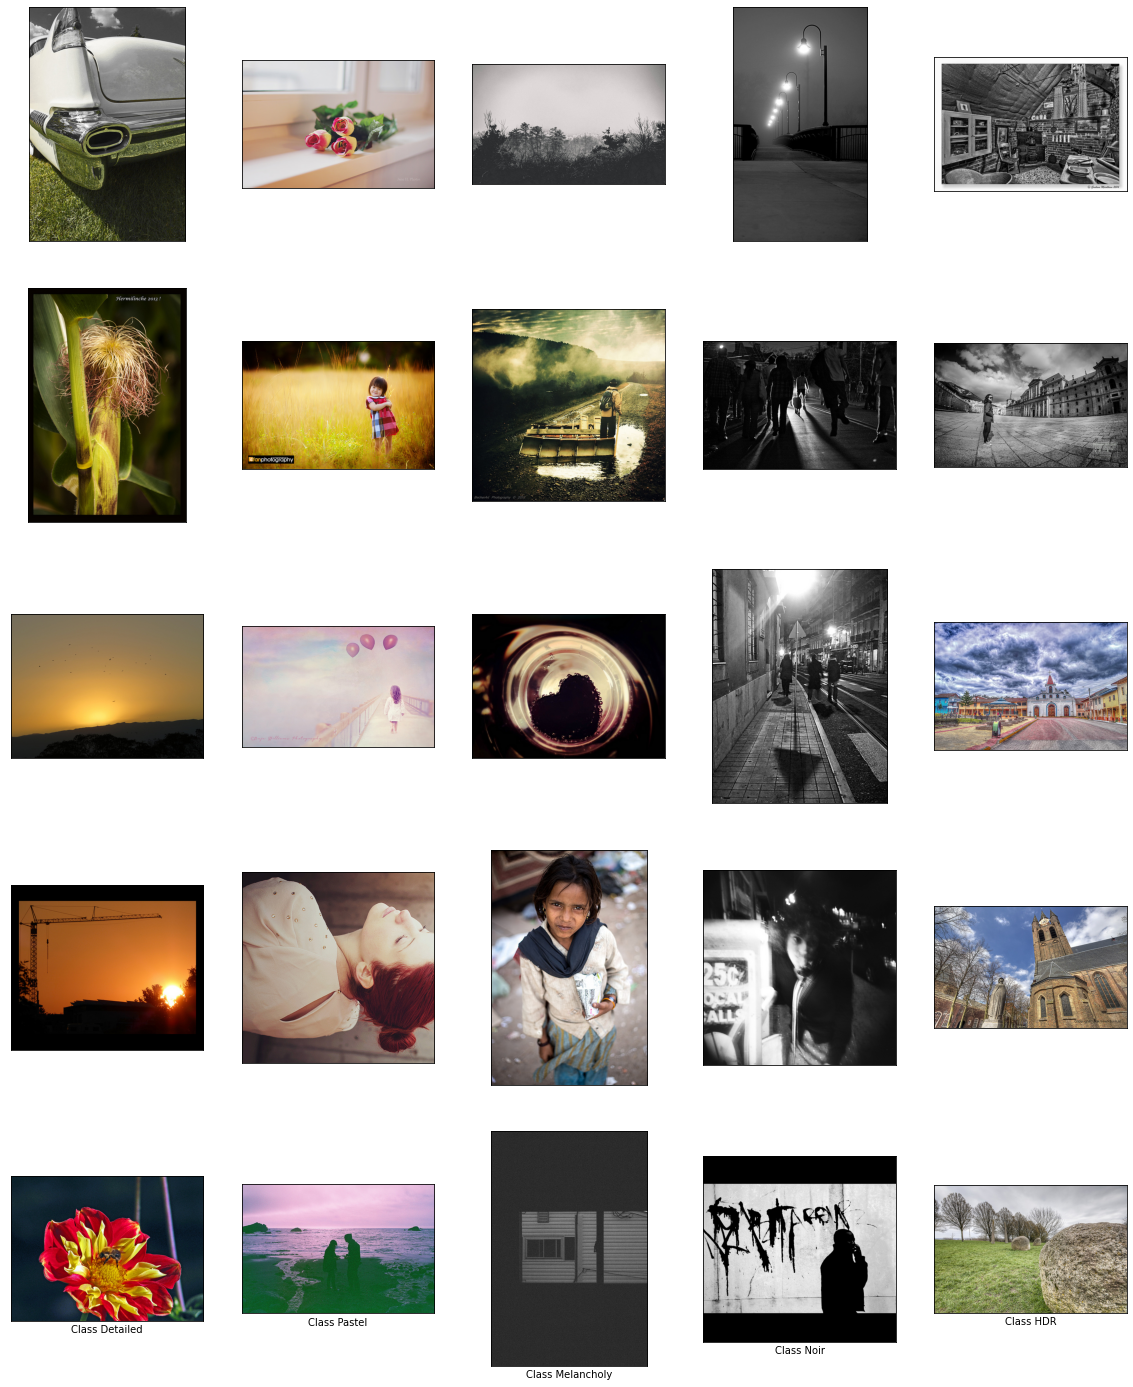

In [6]:
# Mostramos 5 imágenes de cada clase.
plot_n_images = 5
fig = plt.figure(figsize=(20, 25))

np.random.seed(1000)
for i in range(0,5):
    select_frame = train_frame[train_frame['labels_idx']==i]
    for j in range(0,plot_n_images):
        aux_index = np.random.choice(select_frame.index)
        fig_i=fig.add_subplot(plot_n_images,5,j*5+i+1)
        fig_i.imshow(plt.imread(train_frame['files'][aux_index]))
        
        fig_i.set_xticks(())
        fig_i.set_yticks(())
        
    fig_i.set_xlabel('Class %s' % style_labels[i])

<a id="section3"></a>
# <font color="#004D7F" size=5>Red convolucional desde 0</font>

Los primeros experimentos que vamos a realizar será utilizando redes que creemos nosotros mismos. Para ello vamos a tener que transformar las imágense al igual que hicimos en clase, pero esta vez solamente tendremos que realizar estos pasos:

1. Cargar las imágenes
2. Redimensionar todoas las imágenes para tener el mismo tamaño. Usaremos un tamaño de `(150, 150, 3)`.

Como véis, al usar nuestras redes desde 0 no será necesario usar la función `preprocess_input` que tenemos que usar al usar una red pre-entrenada.

La función para transformar las imágenes sería la siguientes:

In [7]:
def load_img(img_path):
    # cargamos y redimensionamos una imágen
    img = tf.keras.utils.load_img(
        img_path,
        target_size=(150, 150, 3) 
    )
    
    # cambiamos el tipo imagen a un numpy.array
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    
    # normalizamos los valores entre 0 y 1
    return img_array / 255

Ahora vamos a cargar las imágenes para poder entrenar nuestras redes convolucionales:

In [8]:
# cargamos las imágenes ya transformadas
x_train = np.array([load_img(img_path) for img_path in train_frame['files']])
x_test = np.array([load_img(img_path) for img_path in test_frame['files']])

# cargamos las clases de cada imagen
y_train = train_frame['labels_idx']
y_test = test_frame['labels_idx']

<a id="section3.1"></a>
### <font color="#004D7F" size=4>Ejercicio 1</font>

Crear una red con la siguiente configuración y entrénala:

Arquitectura de la red:

- Capa convolucional `Conv2D` con 16 filtros/kernels de tamaño `(3,3)`, padding con relleno, activación *ReLU* y con entrada `(150,150,3)`
- Capa pooling `MaxPool2D` con reducción de 2 tanto en tamaño como en desplazamiento (stride) y padding con relleno.
- Capa de aplanado `Flatten`.
- Capa densa `Dense` con 64 neuronas y función de activación _ReLU_.
- Capa densa `Dense` con 32 neuronas y función de activación _ReLU_.
- Capa de salida densa `Dense` con 5 neuronas y función de activación _Softmax_.

Configuración del entrenamiento:

- Optimizador: Adam con factor de entrenamiento 0.001
- Función de error: `sparce_categorical_crossentropy`.
- Métricas: `accuracy`.
- Número de _epochs_: 10
- Validation split: 0.2

In [9]:
# Definimos la red
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D (16, (3,3), padding = 'same', activation = 'relu', input_shape = (150,150,3)),
    tf.keras.layers.MaxPool2D (pool_size = (2,2), strides = (2,2), padding = 'same'),
    tf.keras.layers.Flatten (),
    tf.keras.layers.Dense (64, activation = 'relu'),
    tf.keras.layers.Dense (32, activation = 'relu'),
    tf.keras.layers.Dense (5, activation = 'softmax')])

# Definimos el optimizador
opt = tf.keras.optimizers.Adam (learning_rate = 0.001)
# Compilamos el modelo
model.compile (optimizer = opt, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
# Visualizamos el modelo
model.summary ()
# Entrenamiento
hist1 = model.fit (x_train, y_train, epochs = 10, validation_split = 0.2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 90000)             0         
                                                                 
 dense (Dense)               (None, 64)                5760064   
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 5)                 165       
                                                        

Evalua el modelo con el conjunto de test y muestra en una gráfica la evolución del entrenamiento:

In [10]:
model.evaluate (x_test, y_test)

10/10 [==============================] - 0s 7ms/step - loss: 1.8309 - accuracy: 0.5094


[1.8309199810028076, 0.5093749761581421]

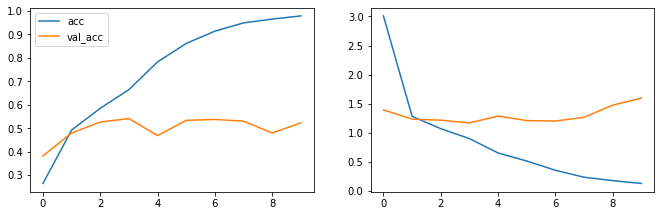

In [11]:
fig=plt.figure(figsize=(60, 40))

# error
fig.add_subplot(10, 10, 2)
plt.plot(hist1.history['loss'], label='loss')
plt.plot(hist1.history['val_loss'], label='val_loss')

# precision
fig.add_subplot(10, 10, 1)
plt.plot(hist1.history['accuracy'], label='acc')
plt.plot(hist1.history['val_accuracy'], label='val_acc')
plt.legend()

plt.legend()
plt.show()

Escribe un pequeño texto sacando conclusiones de los resultado obtenidos:

Esta red creada desde 0, presenta al momento de evaluarla un accuracy del 50.94 %, y donde vemos en la gráfica que presenta overfitting. Como conclusión inicial, observamos que nuestra red no tiene un rendimiento óptimo. 

<a id="section3.2"></a>
### <font color="#004D7F" size=4>Ejercicio 2</font>

Crear una red con la siguiente configuración y entrénala:

Arquitectura de la red:

- Capa convolucional `Conv2D` con 64 filtros/kernels de tamaño `(3,3)`, padding con relleno, activación *ReLU* y con entrada `(150,150,3)`
- Capa pooling `MaxPool2D` con reducción de 2 tanto en tamaño como en desplazamiento (stride) y padding con relleno.
- Capa convolucional `Conv2D` con 32 filtros/kernels de tamaño `(3,3)`, padding con relleno, activación *ReLU*
- Capa pooling `MaxPool2D` con reducción de 2 tanto en tamaño como en desplazamiento (stride) y padding con relleno.
- Capa convolucional `Conv2D` con 32 filtros/kernels de tamaño `(3,3)`, padding con relleno, activación *ReLU*
- Capa pooling `MaxPool2D` con reducción de 2 tanto en tamaño como en desplazamiento (stride) y padding con relleno.
- Capa de aplanado `Flatten`.
- Capa densa `Dense` con 64 neuronas y función de activación _ReLU_.
- Capa `Dropout` con un valor de `0.75`.
- Capa densa `Dense` con 32 neuronas y función de activación _ReLU_.
- Capa densa `Dense` con 32 neuronas y función de activación _ReLU_.
- Capa `Dropout` con un valor de `0.6`.
- Capa de salida densa `Dense` con 10 neuronas y función de activación _Softmax_.

Configuración del entrenamiento:

- Optimizador: Adam con factor de entrenamiento 0.001
- Función de error: `sparce_categorical_crossentropy`.
- Métricas: `accuracy`.
- Número de _epochs_: 50
- Validation split: 0.2

In [12]:
# Definimos la red
model = tf.keras.models.Sequential ([
    tf.keras.layers.Conv2D (64, (3,3), padding = 'same', activation = 'relu', input_shape = (150,150,3)),
    tf.keras.layers.MaxPool2D (pool_size = (2,2), strides = (2,2), padding = 'same'),
    tf.keras.layers.Conv2D (32, (3,3), padding = 'same', activation = 'relu'),
    tf.keras.layers.MaxPool2D (pool_size = (2,2), strides = (2,2), padding = 'same'),
    tf.keras.layers.Conv2D (32, (3,3), padding = 'same', activation = 'relu'),
    tf.keras.layers.MaxPool2D (pool_size = (2,2), strides = (2,2), padding = 'same'),
    tf.keras.layers.Flatten (),
    tf.keras.layers.Dense (64, activation = 'relu'),
    tf.keras.layers.Dropout (0.75),
    tf.keras.layers.Dense (32, activation = 'relu'),
    tf.keras.layers.Dense (32, activation = 'relu'),
    tf.keras.layers.Dropout (0.6),
    tf.keras.layers.Dense (10, activation = 'softmax')
])
# Definimos el optimizador
opt = tf.keras.optimizers.Adam (learning_rate = 0.001)
# Compilamos el model
model.compile (optimizer = opt, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
# Visulizamos el modelo
model.summary ()
# Entrenamos el modelo
hist2 = model.fit(x_train, y_train, epochs = 50, validation_split = 0.2)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 150, 150, 64)      1792      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 75, 75, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 38, 38, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 38, 38, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 19, 19, 32)      

Evalua el modelo con el conjunto de test y muestra en una gráfica la evolución del entrenamiento:

In [13]:
model.evaluate (x_test, y_test)

10/10 [==============================] - 0s 13ms/step - loss: 2.1100 - accuracy: 0.3938


[2.109959125518799, 0.39375001192092896]

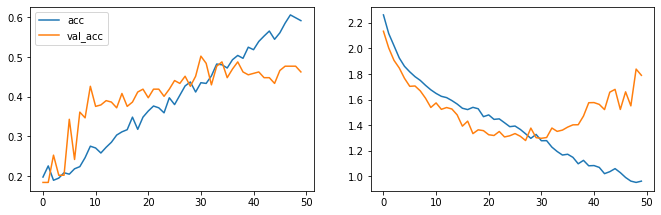

In [14]:
fig=plt.figure(figsize=(60, 40))

# error
fig.add_subplot(10, 10, 2)
plt.plot(hist2.history['loss'], label='loss')
plt.plot(hist2.history['val_loss'], label='val_loss')

# precision
fig.add_subplot(10, 10, 1)
plt.plot(hist2.history['accuracy'], label='acc')
plt.plot(hist2.history['val_accuracy'], label='val_acc')
plt.legend()

plt.legend()
plt.show()

Escribe un pequeño texto sacando conclusiones de los resultado obtenidos:

Vemos que al complejizar nuestro modelo, el accuracy es del 39.38
 %, siendo menor el rendimiento con respecto al modelo anterior, pero si presenta menor overfitting.

<a id="section4"></a>
# <font color="#004D7F" size=5>Red pre-entrenada (InceptionV3)</font>

Ahora vamos a realizar experimento usando la técnica de _fine-tuning_ y utilizando el modelo pre-entrenado de [_InceptionV3_](https://www.tensorflow.org/api_docs/python/tf/keras/applications/inception_v3/InceptionV3).

Los ejercicios siguientes podéis observar que son los mismos ejercicios de la actividad de la semana 2.

<a id="section4.1"></a>
## <font color="#004D7F" size=4>Ejercicio 3: preprocesamiento de las imágenes</font>
Como vamos a usar un modelo pre-entreando tenemos que definir la función que nos transforme las imágenes a utilizar. Como hemos visto en clase, para utilizar las imágenes usando un modelo pre-entrenado es necesario realizar una transformación sobre las imágenes que vamos a utilizar, es decir, tenemos que:

1. Cargar las imágenes
2. Redimensionarlas
3. Usar la función de `preprocess_input` del modelo pre-entrenado que vamos a utilizar.

En este caso vamos a utilizar otro modelo pre-entrado entre los que están disponibles en `tf.keras`, esta vez vamos a usar el modelo de _InceptionV3_, um modelo muy popular y usando frecuentemente. Podéis ver toda la información de este modelo [aquí](https://www.tensorflow.org/api_docs/python/tf/keras/applications/inception_v3/InceptionV3). Este modelo utilizar un tamaño de imagen de _**(299, 299, 3)**_, por lo que tendrás que usar este tamaño en el redimensionamiento.

Como hemos hecho en clase, define una función que se llame `load_img_inceptionv3(img_path)` a la cual le pasamos la ruta donde está alojada una imagen y le realiza todas las transformación necesarias para poder se utilizada luego en el proceso de entrenamiento.

In [15]:
def load_img_inceptionv3(img_path):
    # Cargar las imagenes y redimensionarlas
    img = tf.keras.utils.load_img (
        img_path,
        target_size = (299,299,3))
    # Cambiar el tipo de imagen a array de numpy
    img_array = tf.keras.preprocessing.image.img_to_array (img)
    # Apicamos la funcion preprocess_imput de inceptionv3
    return tf.keras.applications.inception_v3.preprocess_input(img_array)

**Test**: Puedes probar esta función con el siguiente test, cuando la tengas definida ejecuta la siguiente celda y te debería dar como resultado:

```python
-0.5529412
```

In [16]:
img = load_img_inceptionv3('data/flickr_style/images/2216312257_2ba4af8439.jpg')
img[0,0,0]

-0.5529412

<a id="section4.2"></a>
## <font color="#004D7F" size=4>Ejercicio 4: aplicar el preprocesamiento a todas las imágenes</font>
Una vez tenemos definida nuestra función de para transformar las imágenes, aplíca la transformación tanto al conjunto de train como al conjunto de test como hemos visto en clase.

In [17]:
# cargamos las imágenes ya transformadas
x_train = np.array([load_img_inceptionv3(img_path) for img_path in train_frame ['files']])
x_test = np.array([load_img_inceptionv3(img_path) for img_path in test_frame ['files']])

# cargamos las clases de cada imagen
y_train = train_frame ['labels_idx']
y_test = test_frame ['labels_idx']

**Test**: Puedes probar si lo has hecho correctamente con el siguiente test, cuando hayas terminado ejecuta la siguiente celda y te debería dar como resultado:

```python
(array([-0.5529412, -0.5529412, -0.5372549], dtype=float32), 3)
```

In [18]:
x_train[0,0,0], y_train[0]

(array([-0.5529412, -0.5529412, -0.5372549], dtype=float32), 3)

<a id="section4.3"></a>
## <font color="#004D7F" size=4>Ejercicio 5: cargar el modelo pre-entrenado InceptionV3</font>
Una vez tenemos los datos listos, vamos a cargar el modelo pre-entrenado de [_InceptionV3_](https://www.tensorflow.org/api_docs/python/tf/keras/applications/inception_v3/InceptionV3).

Como vamos a aplicar _fine-tuning_ recuerda usar los siguientes parámetros:
- `input_shape=(299, 299, 3)`
- `include_top=False`
- `pooling='avg'`

Además tienes que congelar todas las capas para que no se entrenen todas, recureda que solo queremos entrenar las últimas que añadamos nosotros.

In [19]:
# Carga del modelo base
base_model = tf.keras.applications.inception_v3.InceptionV3 (
    include_top = False,
    pooling = 'avg',
    input_shape = (299,299,3)
)
# Congelamos el entrenamiento de todas las capas
for layer in base_model.layers:
  layer_trainable = False

87924736/87910968 [==============================] - 0s 0us/step


**Test**: Puedes probar si lo has hecho correctamente con el siguiente test, cuando hayas terminado ejecuta la siguiente celda y te debería dar como resultado:

```python
[<keras.layers.merge.Concatenate at **************>,
 <keras.layers.pooling.GlobalAveragePooling2D at **************>]
```

In [20]:
base_model.layers[-2:]

<a id="section4.4"></a>
## <font color="#004D7F" size=4>Ejercicio 6: añadir capas al modelo (_fine-tuning_)</font>
Una vez tenemos nuestro modelo base, vamos a añadir capas densas al final para entrenarlas y que el modelo se ajuste a nuestros datos.

Añade las siguientes capas al modelo base cargado:
- Capa Dropout con un valor de 0.60.
- Capa Densa de 128 neuronas y función de activación `relu`.
- Capa Dropout con un valor de 0.4.
- Capa Densa de salida con 5 neuronas y función de activación `softmax`.

In [21]:
# Accedemos a la última capa del modelo
base_model.output
# Conectamos las nuevas capas con las ultimas del modelo base
x1 = tf.keras.layers.Dropout (0.6)(base_model.output)
x2 = tf.keras.layers.Dense (128, activation = 'relu')(x1)
x3 = tf.keras.layers.Dropout (0.4)(x2)
x4 = tf.keras.layers.Dense (5, activation = 'softmax')(x3)
# Accedemeos a la primer capa del modelo
base_model.input
# Creamos el modelo
model = tf.keras.Model(base_model.input, x4)

**Test**: Puedes probar si lo has hecho correctamente con el siguiente test, cuando hayas terminado ejecuta la siguiente celda y te debería dar como resultado:

```python
[<keras.layers.core.dropout.Dropout at **************>,
 <keras.layers.core.dense.Dense at **************>,
 <keras.layers.core.dropout.Dropout at **************>,
 <keras.layers.core.dense.Dense at **************>]
```

In [22]:
model.layers[-4:]

<a id="section4.5"></a>
## <font color="#004D7F" size=4>Ejercicio 7: entrenar el modelo</font>
Una vez tenemos nuestro modelo listo para entrenar, vamos a configurar el entrenamiento y a entrenar nuesto modelo.

En el entrenamiento utiliza:
- Optimizador: Adam con learning rate de 0.001.
- Función de coste: `sparse_categorical_crossentropy`.
- Métricas: `accuracy`.
- Epochs: `25`
- validation_split: 0.2

In [23]:
# Configuracion del entrenamiento
adam = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
# Entrenamos el modelo 
hist3 = model.fit (x_train, y_train, epochs = 25, validation_split = 0.2)

Epoch 1/25
35/35 [==============================] - 35s 671ms/step - loss: 1.4941 - accuracy: 0.4233 - val_loss: 21.7023 - val_accuracy: 0.2058
Epoch 2/25
35/35 [==============================] - 16s 472ms/step - loss: 1.2247 - accuracy: 0.5153 - val_loss: 7.5007 - val_accuracy: 0.2022
Epoch 3/25
35/35 [==============================] - 17s 485ms/step - loss: 1.1993 - accuracy: 0.5569 - val_loss: 2.0265 - val_accuracy: 0.3827
Epoch 4/25
35/35 [==============================] - 17s 477ms/step - loss: 1.0413 - accuracy: 0.6038 - val_loss: 12.9219 - val_accuracy: 0.2130
Epoch 5/25
35/35 [==============================] - 16s 471ms/step - loss: 0.9833 - accuracy: 0.6345 - val_loss: 1.6668 - val_accuracy: 0.4657
Epoch 6/25
35/35 [==============================] - 16s 470ms/step - loss: 0.9261 - accuracy: 0.6498 - val_loss: 1.6496 - val_accuracy: 0.4693
Epoch 7/25
35/35 [==============================] - 16s 471ms/step - loss: 0.9098 - accuracy: 0.6733 - val_loss: 9.6779 - val_accuracy: 0.31

<a id="section4.6"></a>
## <font color="#004D7F" size=4>Ejercicio 8: evaluar el modelo</font>
Una vez entrenado el modelo usando _fine-tuning_ evalua el modelo usando el conjunto de test en la función `evaluate` y extráe conlcusiones de si el modelo tiene un buen rendimiento o no. Puedes visualizar como ha ido el entrenamiento usando una gráfica como hemos visto en clase.

In [24]:
model.evaluate (x_test, y_test)

10/10 [==============================] - 2s 125ms/step - loss: 2.5761 - accuracy: 0.5719


[2.5761282444000244, 0.5718749761581421]

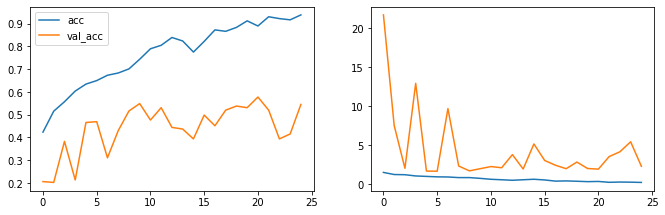

In [25]:
fig=plt.figure(figsize=(60, 40))

# error
fig.add_subplot(10, 10, 2)
plt.plot(hist3.history['loss'], label='loss')
plt.plot(hist3.history['val_loss'], label='val_loss')

# precision
fig.add_subplot(10, 10, 1)
plt.plot(hist3.history['accuracy'], label='acc')
plt.plot(hist3.history['val_accuracy'], label='val_acc')
plt.legend()

plt.legend()
plt.show()

En esta red InceptionV3 con fine tunning, no se ha logrado mejorar el modelo, con un accuracy de 57.19 % y un marcado overfitting, no tiene un buen rendimiento.

<a id="section5"></a>
# <font color="#004D7F" size=5>Red opcional</font>

<a id="section5.1"></a>
## <font color="#004D7F" size=4>Ejercicio 7</font>

En este ejercicio tienes vía libre para crear una red que tu creas que va a funcionar mejor. Puedes usar una red construida desde 0 que tu creas que funcionará mejor o puedes usar un modelo pre-entrenado entre los que puedes seleccionar en `tf._keras.applications` que puedes ver [aquí](https://www.tensorflow.org/api_docs/python/tf/keras/applications).

Usa las capas que tú quieras y la configuración de entrenamiento que tu elijas.

In [26]:
# Carga del modelo base
base_model = tf.keras.applications.Xception (
    include_top = False,
    pooling = 'avg',
    input_shape = (299,299,3)
)
# Congelamos el entrenamiento de todas las capas
for layer in base_model.layers:
  layer_trainable = False

83697664/83683744 [==============================] - 1s 0us/step


In [27]:
# Accedemos a la última capa del modelo
base_model.output
# Conectamos las nuevas capas con las ultimas del modelo base
x1 = tf.keras.layers.Dropout (0.6)(base_model.output)
x2 = tf.keras.layers.Dense (128, activation = 'relu')(x1)
x3 = tf.keras.layers.Dropout (0.4)(x2)
x4 = tf.keras.layers.Dense (5, activation = 'softmax')(x3)
# Accedemeos a la primer capa del modelo
base_model.input
# Creamos el modelo
model = tf.keras.Model (base_model.input, x4)

In [28]:
# Configuracion del entrenamiento
adam = tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
# Entrenamos el modelo 
hist4 = model.fit (x_train, y_train, epochs = 50, validation_split = 0.2)

Epoch 1/50
35/35 [==============================] - 53s 1s/step - loss: 1.7240 - accuracy: 0.2076 - val_loss: 1.5975 - val_accuracy: 0.2202
Epoch 2/50
35/35 [==============================] - 42s 1s/step - loss: 1.6839 - accuracy: 0.2121 - val_loss: 1.5917 - val_accuracy: 0.2202
Epoch 3/50
35/35 [==============================] - 42s 1s/step - loss: 1.6752 - accuracy: 0.2419 - val_loss: 1.5853 - val_accuracy: 0.2599
Epoch 4/50
35/35 [==============================] - 42s 1s/step - loss: 1.6525 - accuracy: 0.2473 - val_loss: 1.5781 - val_accuracy: 0.2924
Epoch 5/50
35/35 [==============================] - 42s 1s/step - loss: 1.6605 - accuracy: 0.2482 - val_loss: 1.5709 - val_accuracy: 0.3105
Epoch 6/50
35/35 [==============================] - 42s 1s/step - loss: 1.6514 - accuracy: 0.2419 - val_loss: 1.5631 - val_accuracy: 0.3213
Epoch 7/50
35/35 [==============================] - 42s 1s/step - loss: 1.6334 - accuracy: 0.2455 - val_loss: 1.5559 - val_accuracy: 0.3321
Epoch 8/50
35/35 [==

In [29]:
model.evaluate (x_test, y_test)

10/10 [==============================] - 3s 257ms/step - loss: 1.2606 - accuracy: 0.5344


[1.2606040239334106, 0.534375011920929]

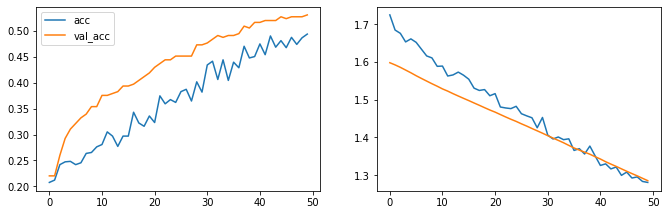

In [30]:
fig=plt.figure(figsize=(60, 40))

# error
fig.add_subplot(10, 10, 2)
plt.plot(hist4.history['loss'], label='loss')
plt.plot(hist4.history['val_loss'], label='val_loss')

# precision
fig.add_subplot(10, 10, 1)
plt.plot(hist4.history['accuracy'], label='acc')
plt.plot(hist4.history['val_accuracy'], label='val_acc')
plt.legend()

plt.legend()
plt.show()

<a id="section6"></a>
# <font color="#004D7F" size=5>¿Cuál es el mejor modelo?</font>

<a id="section6.1"></a>
## <font color="#004D7F" size=4>Ejercicio 8</font>

Una vez realizado todos los experimentos anteriores, ¿qué modelo elegirías para desplegar en producción? ¿Por qué?

Explica en breves palabras qué modelo eligirías para desplegar en producción y porqué. Compara cada experimento y extráe tus propias conclusiones.

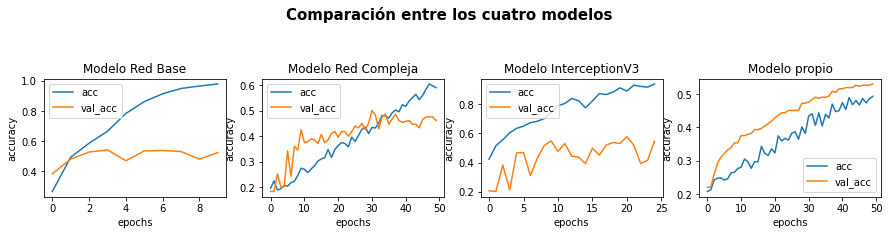

In [32]:
plt.figure (figsize=(15,10))
plt.suptitle ("Comparación entre los cuatro modelos",fontsize=15,fontweight='black')

plt.subplot (4,4,1)
plt.plot(hist1.history['accuracy'], label='acc')
plt.plot(hist1.history['val_accuracy'], label='val_acc')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.title('1. Modelo Red Base')
plt.legend()

plt.subplot (4,4,2)
plt.plot(hist2.history['accuracy'], label='acc')
plt.plot(hist2.history['val_accuracy'], label='val_acc')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.title('2. Modelo Red Compleja')
plt.legend()

plt.subplot (4,4,3)
plt.plot(hist3.history['accuracy'], label='acc')
plt.plot(hist3.history['val_accuracy'], label='val_acc')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.title('3. Modelo InterceptionV3')
plt.legend()

plt.subplot (4,4,4)
plt.plot(hist4.history['accuracy'], label='acc')
plt.plot(hist4.history['val_accuracy'], label='val_acc')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.title('4. Modelo propio')
plt.legend()

**CONCLUSIÓN**

En la figura anterior se realiza un cuadro comparativo entre los cuatro modelos realizados en el proyecto, y se puede apreciar como en los distintos experimentos fueron mejorando los resultados. En el *"Modelo Base"*, el modelo incial lo podemos tomar como benchmark de nuestro proyecto. Se observa un redimiento regular, con un accuracy de 50 %, y observando overfitting a medida que transcurren las epochs, siendo un modelo que claramente puede mejorarse. En el segundo caso, el *"Modelo Red Compleja"*, si bien el overfitting disminuye, la precisión del modelo disminuye a poco más del 40 %. En este caso, el complejizar el modelo no nos ayudo a mejorar los resultados. En el tercer caso, utilizamos un red de aprendizaje profundo de Google, *InceptionV3* y realizamos *fine tunning* para ver si existen mejoras. Si bien la precisión mejoró a un 57 %, si bien todavia presenta overfitting, hemos tenido una mejora del 7 % con respecto al modelo inicial. Finalmente, en el modelo propio, decidí modificar primero el modelo pre entrenado de InceptionV3 a *Xception*, que en lo que pude investigar también es un modelo con un buen rendimiento (dentro del top 10). Ademas tambien modifiqué en este experimento el optimizador, de Adam a *SGD*, utilizando la misma red anteriormente utilizada. En este caso, si bien el rendimiento disminuyó levemente (53.44 %), pude lograr mejorar las curvas de resultados, siendo el modelo que presenta menor overfitting, con tendencia a seguir mejorando. Si tengo que tomar una determinación en cuanto al mejor modelo, creo que elegiría el modelo final, ya que si bien no es el de mejor rendimiento, presenta curvas con tendencia a seguir mejorando y con el menor overfitting. Quedaría si seguir mejorándolo para lograr todavía un mejor resultado. 